<a href="https://colab.research.google.com/github/Stark-017/APP-DEVELOPMENT/blob/main/colabs/intro/Intro_to_Weights_%26_Biases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/wandb/examples/blob/master/colabs/intro/Intro_to_Weights_&_Biases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<!--- @wandbcode{intro-colab} -->

<a href="https://colab.research.google.com/github/wandb/examples/blob/master/colabs/intro/Intro_to_Weights_&_Biases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
<!--- @wandbcode{intro-colab} -->

<img src="http://wandb.me/logo-im-png" width="400" alt="Weights & Biases" />
<!--- @wandbcode{intro-colab} -->

Use [W&B](https://wandb.ai/site?utm_source=intro_colab&utm_medium=code&utm_campaign=intro) for machine learning experiment tracking, model checkpointing, collaboration with your team and more. See the full W&B Documentation [here](https://docs.wandb.ai/).

In this notebook, you will create and track a machine learning experiment using a simple PyTorch model. By the end of the notebook, you will have an interactive project dashboard that you can share and customize with other members of your team. [View an example dashboard here](https://wandb.ai/wandb/wandb_example).

## Prerequisites

Install the W&B Python SDK and log in:

In [1]:
!pip install wandb -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 93.7 MB/s eta 0:00:00


In [2]:
# Log in to your W&B account
import wandb
import random
import math

In [3]:
wandb.login()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: ar17 (ar17-svkm-s-narsee-monjee-institute-of-management-studies) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## Simulate and track a machine learning experiment with W&B

Create, track, and visualize a machine learning experiment. To do this:

1. Initialize a [W&B run](https://docs.wandb.ai/guides/runs) and pass in the hyperparameters you want to track.
2. Within your training loop, log metrics such as the accuracy and loss.

In [4]:
import random
import math

# Launch 5 simulated experiments
total_runs = 5
for run in range(total_runs):
  # 1️. Start a new run to track this script
  wandb.init(
      # Set the project where this run will be logged
      project="basic-intro",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"experiment_{run}",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": 0.02,
      "architecture": "CNN",
      "dataset": "CIFAR-100",
      "epochs": 10,
      })

  # This simple block simulates a training loop logging metrics
  epochs = 10
  offset = random.random() / 5
  for epoch in range(2, epochs):
      acc = 1 - 2 ** -epoch - random.random() / epoch - offset
      loss = 2 ** -epoch + random.random() / epoch + offset

      # 2️. Log metrics from your script to W&B
      wandb.log({"acc": acc, "loss": loss})

  # Mark the run as finished
  wandb.finish()

acc,▁▄█▆█▇▇█
loss,█▃▃▂▁▁▂▁
acc,0.8168
loss,0.20011


acc,▁▃▅▆▇▇█▇
loss,█▆▄▃▂▁▂▂
acc,0.79233
loss,0.20805


acc,▁▃▆▆█▆▇█
loss,▆█▄▃▁▁▂▂
acc,0.81171
loss,0.24786


acc,▁▆▇█▇▇█▇
loss,█▇▂▃▁▂▂▁
acc,0.86864
loss,0.03779


acc,▁▂▅▅▆███
loss,█▆▅▃▃▁▁▂
acc,0.80608
loss,0.25263


View how your machine learning peformed in your W&B project. Copy and paste the URL link that is printed from the previous cell. The URL will redirect you to a W&B project that contains a dashboard showing graphs the show how

The following image shows what a dashboard can look like:

![](https://i.imgur.com/Pell4Oo.png)

Now that we know how to integrate W&B into a psuedo machine learning training loop, let's track a machine learning experiment using a basic PyTorch neural network. The following code will also upload model checkpoints to W&B that you can then share with other teams in in your organization.

##  Track a machine learning experiment using Pytorch

The following code cell defines and trains a simple MNIST classifier. During training, you will see W&B prints out URLs. Click on the project page link to see your results stream in live to a W&B project.

W&B runs automatically log [metrics](https://docs.wandb.ai/ref/app/pages/run-page#charts-tab),
[system information](https://docs.wandb.ai/ref/app/pages/run-page#system-tab),
[hyperparameters](https://docs.wandb.ai/ref/app/pages/run-page#overview-tab),
[terminal output](https://docs.wandb.ai/ref/app/pages/run-page#logs-tab) and
you'll see an [interactive table](https://docs.wandb.ai/guides/data-vis)
with model inputs and outputs.

### Set up PyTorch Dataloader
The following cell defines some useful functions that we will need to train our machine learning model. The functions themselves are not unique to W&B so we'll not cover them in detail here. See the PyTorch documentation for more information on how to define [forward and backward training loop](https://pytorch.org/tutorials/beginner/nn_tutorial.html), how to use [PyTorch DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) to load data in for training, and how define PyTorch models using the [`torch.nn.Sequential` Class](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).

In [5]:
#@title
import torch, torchvision
import torch.nn as nn
from torchvision.datasets import MNIST
import torchvision.transforms as T

MNIST.mirrors = [mirror for mirror in MNIST.mirrors if "http://yann.lecun.com/" not in mirror]

device = "cuda:0" if torch.cuda.is_available() else "cpu"

def get_dataloader(is_train, batch_size, slice=5):
    "Get a training dataloader"
    full_dataset = MNIST(root=".", train=is_train, transform=T.ToTensor(), download=True)
    sub_dataset = torch.utils.data.Subset(full_dataset, indices=range(0, len(full_dataset), slice))
    loader = torch.utils.data.DataLoader(dataset=sub_dataset,
                                         batch_size=batch_size,
                                         shuffle=True if is_train else False,
                                         pin_memory=True, num_workers=2)
    return loader

def get_model(dropout):
    "A simple model"
    model = nn.Sequential(nn.Flatten(),
                         nn.Linear(28*28, 256),
                         nn.BatchNorm1d(256),
                         nn.ReLU(),
                         nn.Dropout(dropout),
                         nn.Linear(256,10)).to(device)
    return model

def validate_model(model, valid_dl, loss_func, log_images=False, batch_idx=0):
    "Compute performance of the model on the validation dataset and log a wandb.Table"
    model.eval()
    val_loss = 0.
    with torch.inference_mode():
        correct = 0
        for i, (images, labels) in enumerate(valid_dl):
            images, labels = images.to(device), labels.to(device)

            # Forward pass ➡
            outputs = model(images)
            val_loss += loss_func(outputs, labels)*labels.size(0)

            # Compute accuracy and accumulate
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            # Log one batch of images to the dashboard, always same batch_idx.
            if i==batch_idx and log_images:
                log_image_table(images, predicted, labels, outputs.softmax(dim=1))
    return val_loss / len(valid_dl.dataset), correct / len(valid_dl.dataset)

### Create a table to compare the predicted values versus the true value

The following cell is unique to W&B, so let's go over it.

In the cell we define a function called `log_image_table`. Though technically, optional, this function creates a W&B Table object. We will use the table object to create a table that shows what the model predicted for each image.

More specifically, each row will conists of the image fed to the model, along with predicted value and the actual value (label).

In [6]:
def log_image_table(images, predicted, labels, probs):
    "Log a wandb.Table with (img, pred, target, scores)"
    # Create a wandb Table to log images, labels and predictions to
    table = wandb.Table(columns=["image", "pred", "target"]+[f"score_{i}" for i in range(10)])
    for img, pred, targ, prob in zip(images.to("cpu"), predicted.to("cpu"), labels.to("cpu"), probs.to("cpu")):
        table.add_data(wandb.Image(img[0].numpy()*255), pred, targ, *prob.numpy())
    wandb.log({"predictions_table":table}, commit=False)

### Train your model and upload checkpoints

The following code trains and saves model checkpoints to your project. Use model checkpoints like you normally would to assess how the model performed during training.

W&B also makes it easy to share your saved models and model checkpoints with other members of your team or organization. To learn how to share your model and model checkpoints with members outside of your team, see [W&B Registry](https://docs.wandb.ai/guides/registry).

In [7]:
# Launch 3 experiments, trying different dropout rates
for _ in range(3):
    # initialise a wandb run
    wandb.init(
        project="pytorch-intro",
        config={
            "epochs": 5,
            "batch_size": 128,
            "lr": 1e-3,
            "dropout": random.uniform(0.01, 0.80),
            })

    # Copy your config
    config = wandb.config

    # Get the data
    train_dl = get_dataloader(is_train=True, batch_size=config.batch_size)
    valid_dl = get_dataloader(is_train=False, batch_size=2*config.batch_size)
    n_steps_per_epoch = math.ceil(len(train_dl.dataset) / config.batch_size)

    # A simple MLP model
    model = get_model(config.dropout)

    # Make the loss and optimizer
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

   # Training
    example_ct = 0
    step_ct = 0
    for epoch in range(config.epochs):
        model.train()
        for step, (images, labels) in enumerate(train_dl):
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            train_loss = loss_func(outputs, labels)
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            example_ct += len(images)
            metrics = {"train/train_loss": train_loss,
                       "train/epoch": (step + 1 + (n_steps_per_epoch * epoch)) / n_steps_per_epoch,
                       "train/example_ct": example_ct}

            if step + 1 < n_steps_per_epoch:
                # Log train metrics to wandb
                wandb.log(metrics)

            step_ct += 1

        val_loss, accuracy = validate_model(model, valid_dl, loss_func, log_images=(epoch==(config.epochs-1)))

        # Log train and validation metrics to wandb
        val_metrics = {"val/val_loss": val_loss,
                       "val/val_accuracy": accuracy}
        wandb.log({**metrics, **val_metrics})

        # Save the model checkpoint to wandb
        torch.save(model, "my_model.pt")
        wandb.log_model("./my_model.pt", "my_mnist_model", aliases=[f"epoch-{epoch+1}_dropout-{round(wandb.config.dropout, 4)}"])

        print(f"Epoch: {epoch+1}, Train Loss: {train_loss:.3f}, Valid Loss: {val_loss:3f}, Accuracy: {accuracy:.2f}")

    # If you had a test set, this is how you could log it as a Summary metric
    wandb.summary['test_accuracy'] = 0.8

    # Close your wandb run
    wandb.finish()

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.77MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.06MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.30MB/s]


Epoch: 1, Train Loss: 0.353, Valid Loss: 0.297448, Accuracy: 0.92
Epoch: 2, Train Loss: 0.308, Valid Loss: 0.237888, Accuracy: 0.93
Epoch: 3, Train Loss: 0.100, Valid Loss: 0.208121, Accuracy: 0.94
Epoch: 4, Train Loss: 0.189, Valid Loss: 0.195465, Accuracy: 0.94
Epoch: 5, Train Loss: 0.142, Valid Loss: 0.180010, Accuracy: 0.94


train/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇█
train/example_ct,▁▁▂▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇▇███████
train/train_loss,█▇▆▅▅▄▃▃▅▃▂▃▄▂▃▂▃▂▃▂▃▃▂▂▂▃▄▂▂▁▂▂▂▃▁▂▃▂▂▂
val/val_accuracy,▁▄▇██
val/val_loss,█▄▃▂▁
test_accuracy,0.8
train/epoch,5
train/example_ct,60000
train/train_loss,0.14219
val/val_accuracy,0.9405
val/val_loss,0.18001


Epoch: 1, Train Loss: 0.267, Valid Loss: 0.278999, Accuracy: 0.92
Epoch: 2, Train Loss: 0.148, Valid Loss: 0.226428, Accuracy: 0.93
Epoch: 3, Train Loss: 0.152, Valid Loss: 0.197520, Accuracy: 0.94
Epoch: 4, Train Loss: 0.103, Valid Loss: 0.175389, Accuracy: 0.94
Epoch: 5, Train Loss: 0.125, Valid Loss: 0.169479, Accuracy: 0.95


train/epoch,▁▁▁▁▂▂▃▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇██
train/example_ct,▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▆▆▆▇▇▇▇▇▇▇▇██
train/train_loss,█▃▃▂▂▂▂▂▂▂▂▁▂▂▂▂▂▁▂▁▂▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val/val_accuracy,▁▃▆██
val/val_loss,█▅▃▁▁
test_accuracy,0.8
train/epoch,5
train/example_ct,60000
train/train_loss,0.12494
val/val_accuracy,0.946
val/val_loss,0.16948


Epoch: 1, Train Loss: 0.272, Valid Loss: 0.273612, Accuracy: 0.92
Epoch: 2, Train Loss: 0.106, Valid Loss: 0.232004, Accuracy: 0.93
Epoch: 3, Train Loss: 0.138, Valid Loss: 0.190004, Accuracy: 0.94
Epoch: 4, Train Loss: 0.148, Valid Loss: 0.181228, Accuracy: 0.94
Epoch: 5, Train Loss: 0.084, Valid Loss: 0.174360, Accuracy: 0.95


train/epoch,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇██████
train/example_ct,▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
train/train_loss,█▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▂▁
val/val_accuracy,▁▁▆▇█
val/val_loss,█▅▂▁▁
test_accuracy,0.8
train/epoch,5
train/example_ct,60000
train/train_loss,0.08379
val/val_accuracy,0.9465
val/val_loss,0.17436


You have now trained your first model using W&B. Click on one of the links above to see your metrics and see your saved model checkpoints in the Artifacts tab in the W&B App UI

## (Optional) Set up a W&B Alert

Create a [W&B Alerts](https://docs.wandb.ai/guides/track/alert) to send alerts to your Slack or email from your Python code.

There are 2 steps to follow the first time you'd like to send a Slack or email alert, triggered from your code:

1) Turn on Alerts in your W&B [User Settings](https://wandb.ai/settings)
2) Add `wandb.alert()` to your code. For example:

```python
wandb.alert(
    title="Low accuracy",
    text=f"Accuracy is below the acceptable threshold"
)
```

The following cell shows a minimal example below to see how to use `wandb.alert`

In [8]:
# Start a wandb run
wandb.init(project="pytorch-intro")

# Simulating a model training loop
acc_threshold = 0.3
for training_step in range(1000):

    # Generate a random number for accuracy
    accuracy = round(random.random() + random.random(), 3)
    print(f'Accuracy is: {accuracy}, {acc_threshold}')

    # Log accuracy to wandb
    wandb.log({"Accuracy": accuracy})

    # If the accuracy is below the threshold, fire a W&B Alert and stop the run
    if accuracy <= acc_threshold:
        # Send the wandb Alert
        wandb.alert(
            title='Low Accuracy',
            text=f'Accuracy {accuracy} at step {training_step} is below the acceptable theshold, {acc_threshold}',
        )
        print('Alert triggered')
        break

# Mark the run as finished (useful in Jupyter notebooks)
wandb.finish()

Accuracy is: 1.058, 0.3
Accuracy is: 0.422, 0.3
Accuracy is: 1.008, 0.3
Accuracy is: 0.624, 0.3
Accuracy is: 1.599, 0.3
Accuracy is: 0.765, 0.3
Accuracy is: 0.743, 0.3
Accuracy is: 0.598, 0.3
Accuracy is: 0.736, 0.3
Accuracy is: 1.147, 0.3
Accuracy is: 0.531, 0.3
Accuracy is: 1.283, 0.3
Accuracy is: 1.295, 0.3
Accuracy is: 0.731, 0.3
Accuracy is: 1.48, 0.3
Accuracy is: 0.974, 0.3
Accuracy is: 0.801, 0.3
Accuracy is: 1.195, 0.3
Accuracy is: 0.592, 0.3
Accuracy is: 1.705, 0.3
Accuracy is: 0.195, 0.3
Alert triggered


Accuracy,▅▂▅▃█▄▄▃▄▅▃▆▆▃▇▅▄▆▃█▁
Accuracy,0.195


You can find the full docs for [W&B Alerts here](https://docs.wandb.ai/guides/track/alert).

## Next steps
The next tutorial you will learn how to do hyperparameter optimization using W&B Sweeps:
[Hyperparameters sweeps using PyTorch](https://colab.research.google.com/github/wandb/examples/blob/master/colabs/pytorch/Organizing_Hyperparameter_Sweeps_in_PyTorch_with_W%26B.ipynb)

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import wandb

sweep_config = {
    'method': 'bayes',
    'metric': {
      'name': 'val_accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [5, 10, 15]
        },
        'optimizer': {
            'values': ['adam', 'sgd', 'rmsprop']
        },
        'num_conv_layers': {
            'values': [1, 2, 3]
        },
        'dropout': {
            'distribution': 'uniform',
            'min': 0.2,
            'max': 0.5
        },
        'learning_rate': {
            'values': [0.01, 0.001, 0.0001]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="cifar10-manual-sweep")

class CustomWandbLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        wandb.log(logs)

def train(config=None):
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    with wandb.init(config=config):
        config = wandb.config

        model = Sequential()
        model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        for _ in range(config.num_conv_layers):
            model.add(Conv2D(64, (3, 3), activation='relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(config.dropout))
        model.add(Dense(10, activation='softmax'))

        model.compile(optimizer=config.optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        model.fit(x_train, y_train,
                  epochs=config.epochs,
                  validation_data=(x_test, y_test),
                  callbacks=[CustomWandbLogger()])

wandb.agent(sweep_id, function=train, count=10)

Create sweep with ID: 05ln39pq
Sweep URL: https://wandb.ai/ar17-svkm-s-narsee-monjee-institute-of-management-studies/cifar10-manual-sweep/sweeps/05ln39pq


wandb: Agent Starting Run: qmeommlz with config:
wandb: 	dropout: 0.22496050175912605
wandb: 	epochs: 15
wandb: 	learning_rate: 0.0001
wandb: 	num_conv_layers: 1
wandb: 	optimizer: adam


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3848 - loss: 1.6773 - val_accuracy: 0.5933 - val_loss: 1.1425
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5917 - loss: 1.1483 - val_accuracy: 0.6073 - val_loss: 1.1430
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6547 - loss: 0.9772 - val_accuracy: 0.6873 - val_loss: 0.9146
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6973 - loss: 0.8614 - val_accuracy: 0.6848 - val_loss: 0.9252
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7214 - loss: 0.7870 - val_accuracy: 0.6988 - val_loss: 0.8676
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7508 - loss: 0.7120 - val_accuracy: 0.7060 - val_loss: 0.8632
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7689 - loss: 0.6535 - val_accuracy: 0.7110 - val_loss: 0.8453
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7837 - loss: 0.6105 -

accuracy,▁▃▄▅▆▆▆▆▇▇▇████
loss,█▆▅▄▄▃▃▃▂▂▂▂▁▁▁
val_accuracy,▁▂▆▆▇▇▇▇█████▇█
val_loss,██▃▃▂▁▁▂▁▁▂▃▄▆▅
accuracy,0.86082
loss,0.38024
val_accuracy,0.7132
val_loss,1.02575


wandb: Agent Starting Run: 46p4bqsh with config:
wandb: 	dropout: 0.2039785819713351
wandb: 	epochs: 15
wandb: 	learning_rate: 0.001
wandb: 	num_conv_layers: 2
wandb: 	optimizer: adam


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.3181 - loss: 1.8359 - val_accuracy: 0.5074 - val_loss: 1.3682
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5313 - loss: 1.3101 - val_accuracy: 0.6039 - val_loss: 1.1315
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5958 - loss: 1.1325 - val_accuracy: 0.6157 - val_loss: 1.0917
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6397 - loss: 1.0151 - val_accuracy: 0.6293 - val_loss: 1.0541
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6637 - loss: 0.9541 - val_accuracy: 0.6710 - val_loss: 0.9518
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6893 - loss: 0.8897 - val_accuracy: 0.6779 - val_loss: 0.9263
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7013 - loss: 0.8440 - val_accuracy: 0.6805 - val_loss: 0.9308
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7200 - loss: 0.7912 -

accuracy,▁▄▅▅▆▆▇▇▇▇▇████
loss,█▆▄▄▃▃▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▅▆▇▇▇▇██▇█▇█
val_loss,█▅▄▄▂▂▂▂▁▁▁▂▁▂▁
accuracy,0.7797
loss,0.61816
val_accuracy,0.7123
val_loss,0.87272


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1yub03c7 with config:
wandb: 	dropout: 0.4312592519167364
wandb: 	epochs: 5
wandb: 	learning_rate: 0.01
wandb: 	num_conv_layers: 1
wandb: 	optimizer: rmsprop


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3390 - loss: 1.8076 - val_accuracy: 0.5473 - val_loss: 1.2574
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5616 - loss: 1.2472 - val_accuracy: 0.6391 - val_loss: 1.0392
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6254 - loss: 1.0841 - val_accuracy: 0.6617 - val_loss: 1.0344
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6558 - loss: 1.0139 - val_accuracy: 0.6449 - val_loss: 1.0332
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6695 - loss: 0.9740 - val_accuracy: 0.6797 - val_loss: 0.9995


accuracy,▁▅▇██
loss,█▄▂▁▁
val_accuracy,▁▆▇▆█
val_loss,█▂▂▂▁
accuracy,0.66806
loss,0.99114
val_accuracy,0.6797
val_loss,0.99954


wandb: Agent Starting Run: rnlhh58e with config:
wandb: 	dropout: 0.20076633608603583
wandb: 	epochs: 15
wandb: 	learning_rate: 0.0001
wandb: 	num_conv_layers: 3
wandb: 	optimizer: adam


Epoch 1/15


Traceback (most recent call last):
  File "/tmp/ipython-input-1585557669.py", line 66, in train
    model.fit(x_train, y_train,
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 124, in error_handler
    del filtered_tb
        ^^^^^^^^^^^
ValueError: Exception encountered when calling Conv2D.call().

Negative dimension size caused by subtracting 3 from 2 for '{{node sequential_1/conv2d_3_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_1/max_pooling2d_2_1/MaxPool2d, sequential_1/conv2d_3_1/convolution/ReadVariableOp)' with input shapes: [?,2,2,64], [3,3,64,64].

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 2, 2, 64), dtype=float32)


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/wandb/agents/pyagent.py", line 297, in _run_job
    self._function()
  File "/tmp/ipython-input-1585557669.py", line 66, in train
    model.fit(x_train, y_train,
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 124, in error_handler
    del filtered_tb
        ^^^^^^^^^^^
ValueError: Exception encountered when calling Conv2D.call().

Negative dimension size caused by subtracting 3 from 2 for '{{node sequential_1/conv2d_3_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_1/max_pooling2d_2_1/MaxPool2d, sequential_1/conv2d_3_1/convolution/ReadVariableOp)' with input shapes: [?,2,2,64]

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.1505 - loss: 2.2395 - val_accuracy: 0.2808 - val_loss: 1.9664
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2821 - loss: 1.9508 - val_accuracy: 0.3896 - val_loss: 1.7173
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3609 - loss: 1.7432 - val_accuracy: 0.4393 - val_loss: 1.5565
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4246 - loss: 1.5838 - val_accuracy: 0.4812 - val_loss: 1.4400
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4582 - loss: 1.4958 - val_accuracy: 0.5052 - val_loss: 1.3940
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4890 - loss: 1.4207 - val_accuracy: 0.5304 - val_loss: 1.3087
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5127 - loss: 1.3680 - val_accuracy: 0.5417 - val_loss: 1.2765
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5337 - loss: 1.3054 -

accuracy,▁▃▄▅▅▆▆▆▇▇▇▇███
loss,█▆▅▄▄▃▃▃▂▂▂▂▁▁▁
val_accuracy,▁▃▄▅▆▆▆▆▇▇▇████
val_loss,█▆▅▄▄▃▃▃▂▂▁▁▁▁▁
accuracy,0.63606
loss,1.03399
val_accuracy,0.6277
val_loss,1.07067


wandb: Agent Starting Run: lump9wf1 with config:
wandb: 	dropout: 0.3660665714886672
wandb: 	epochs: 5
wandb: 	learning_rate: 0.001
wandb: 	num_conv_layers: 3
wandb: 	optimizer: adam


Epoch 1/5


Traceback (most recent call last):
  File "/tmp/ipython-input-1585557669.py", line 66, in train
    model.fit(x_train, y_train,
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 124, in error_handler
    del filtered_tb
        ^^^^^^^^^^^
ValueError: Exception encountered when calling Conv2D.call().

Negative dimension size caused by subtracting 3 from 2 for '{{node sequential_1/conv2d_3_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_1/max_pooling2d_2_1/MaxPool2d, sequential_1/conv2d_3_1/convolution/ReadVariableOp)' with input shapes: [?,2,2,64], [3,3,64,64].

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 2, 2, 64), dtype=float32)


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/wandb/agents/pyagent.py", line 297, in _run_job
    self._function()
  File "/tmp/ipython-input-1585557669.py", line 66, in train
    model.fit(x_train, y_train,
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 124, in error_handler
    del filtered_tb
        ^^^^^^^^^^^
ValueError: Exception encountered when calling Conv2D.call().

Negative dimension size caused by subtracting 3 from 2 for '{{node sequential_1/conv2d_3_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_1/max_pooling2d_2_1/MaxPool2d, sequential_1/conv2d_3_1/convolution/ReadVariableOp)' with input shapes: [?,2,2,64]

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2952 - loss: 1.8704 - val_accuracy: 0.5214 - val_loss: 1.3282
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5249 - loss: 1.3065 - val_accuracy: 0.5927 - val_loss: 1.1487
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5928 - loss: 1.1502 - val_accuracy: 0.6292 - val_loss: 1.0450
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6337 - loss: 1.0508 - val_accuracy: 0.6538 - val_loss: 0.9822
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6595 - loss: 0.9699 - val_accuracy: 0.6652 - val_loss: 0.9500
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6811 - loss: 0.9176 - val_accuracy: 0.6718 - val_loss: 0.9482
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7008 - loss: 0.8602 - val_accuracy: 0.6756 - val_loss: 0.9449
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7140 - loss: 0.8154 

accuracy,▁▄▅▅▆▆▇▇▇▇▇████
loss,█▅▄▄▃▃▃▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▆▆▆▆▇▇▇█████
val_loss,█▅▄▃▃▃▃▁▂▁▁▂▁▁▁
accuracy,0.77194
loss,0.64858
val_accuracy,0.7202
val_loss,0.8402


wandb: Agent Starting Run: 5oh0v7sr with config:
wandb: 	dropout: 0.2825994786532977
wandb: 	epochs: 15
wandb: 	learning_rate: 0.001
wandb: 	num_conv_layers: 1
wandb: 	optimizer: rmsprop


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3666 - loss: 1.7486 - val_accuracy: 0.5509 - val_loss: 1.2964
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5852 - loss: 1.1779 - val_accuracy: 0.5492 - val_loss: 1.2745
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6453 - loss: 1.0213 - val_accuracy: 0.6609 - val_loss: 0.9908
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6763 - loss: 0.9338 - val_accuracy: 0.6472 - val_loss: 1.0845
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6981 - loss: 0.8882 - val_accuracy: 0.6787 - val_loss: 0.9603
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7120 - loss: 0.8505 - val_accuracy: 0.6701 - val_loss: 1.0028
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7266 - loss: 0.8306 - val_accuracy: 0.6940 - val_loss: 0.9427
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7263 - loss: 0.8327 -

accuracy,▁▅▆▇▇▇█████████
loss,█▄▃▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▆▅▇▆█▆▇▇▇██▇█
val_loss,██▂▄▁▂▁▃▄▁▂▂▄▄▄
accuracy,0.72918
loss,0.83224
val_accuracy,0.7045
val_loss,1.11118


wandb: Agent Starting Run: lucjf0tp with config:
wandb: 	dropout: 0.22506964949224492
wandb: 	epochs: 5
wandb: 	learning_rate: 0.01
wandb: 	num_conv_layers: 2
wandb: 	optimizer: adam


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3091 - loss: 1.8353 - val_accuracy: 0.5441 - val_loss: 1.2704
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5474 - loss: 1.2566 - val_accuracy: 0.6021 - val_loss: 1.1255
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6146 - loss: 1.0741 - val_accuracy: 0.6276 - val_loss: 1.0603
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6534 - loss: 0.9764 - val_accuracy: 0.6624 - val_loss: 0.9535
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6838 - loss: 0.8938 - val_accuracy: 0.6719 - val_loss: 0.9207


accuracy,▁▅▆▇█
loss,█▄▃▂▁
val_accuracy,▁▄▆▇█
val_loss,█▅▄▂▁
accuracy,0.68348
loss,0.89715
val_accuracy,0.6719
val_loss,0.9207


wandb: Agent Starting Run: vuva9mt6 with config:
wandb: 	dropout: 0.31278955721628077
wandb: 	epochs: 10
wandb: 	learning_rate: 0.01
wandb: 	num_conv_layers: 2
wandb: 	optimizer: adam


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3154 - loss: 1.8240 - val_accuracy: 0.5239 - val_loss: 1.3304
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5425 - loss: 1.2819 - val_accuracy: 0.6027 - val_loss: 1.1086
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6105 - loss: 1.0978 - val_accuracy: 0.6397 - val_loss: 1.0333
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6475 - loss: 1.0008 - val_accuracy: 0.6653 - val_loss: 0.9562
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6753 - loss: 0.9260 - val_accuracy: 0.6788 - val_loss: 0.9099
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6965 - loss: 0.8688 - val_accuracy: 0.6879 - val_loss: 0.9087
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7113 - loss: 0.8277 - val_accuracy: 0.6959 - val_loss: 0.8894
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7303 - loss: 0.7732 -

accuracy,▁▄▅▆▇▇▇███
loss,█▅▄▃▃▂▂▁▁▁
val_accuracy,▁▄▅▆▇▇▇▇██
val_loss,█▅▄▃▂▂▂▂▁▁
accuracy,0.74432
loss,0.72761
val_accuracy,0.7153
val_loss,0.84864


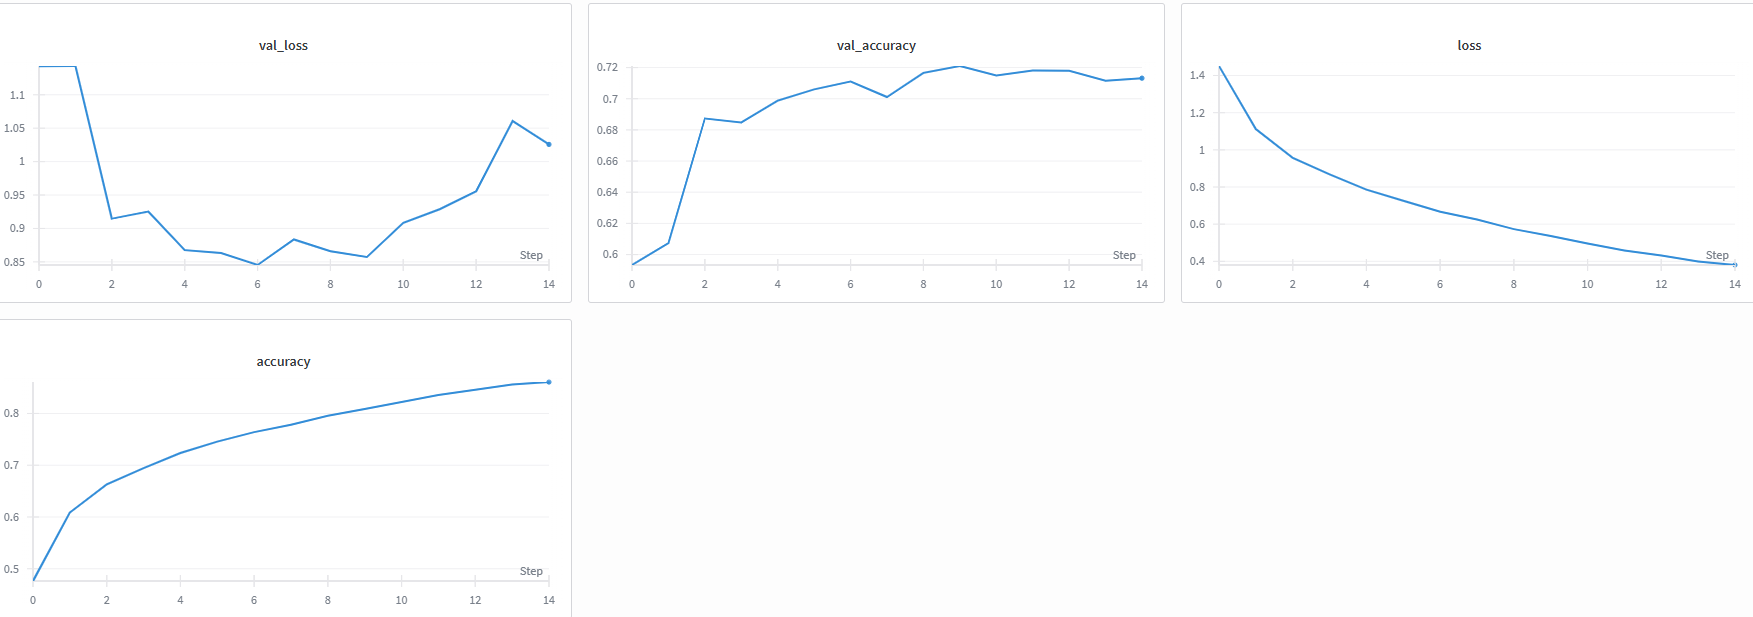


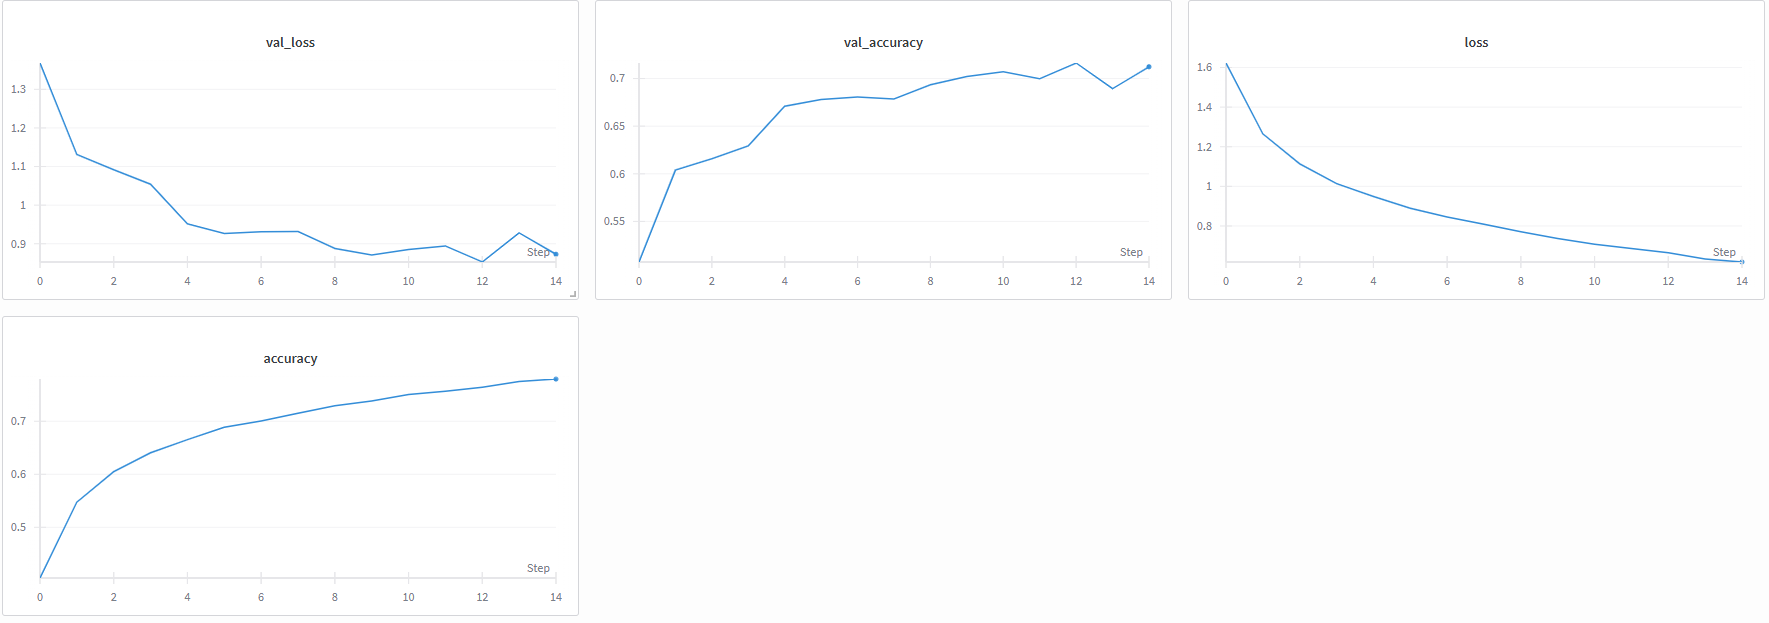


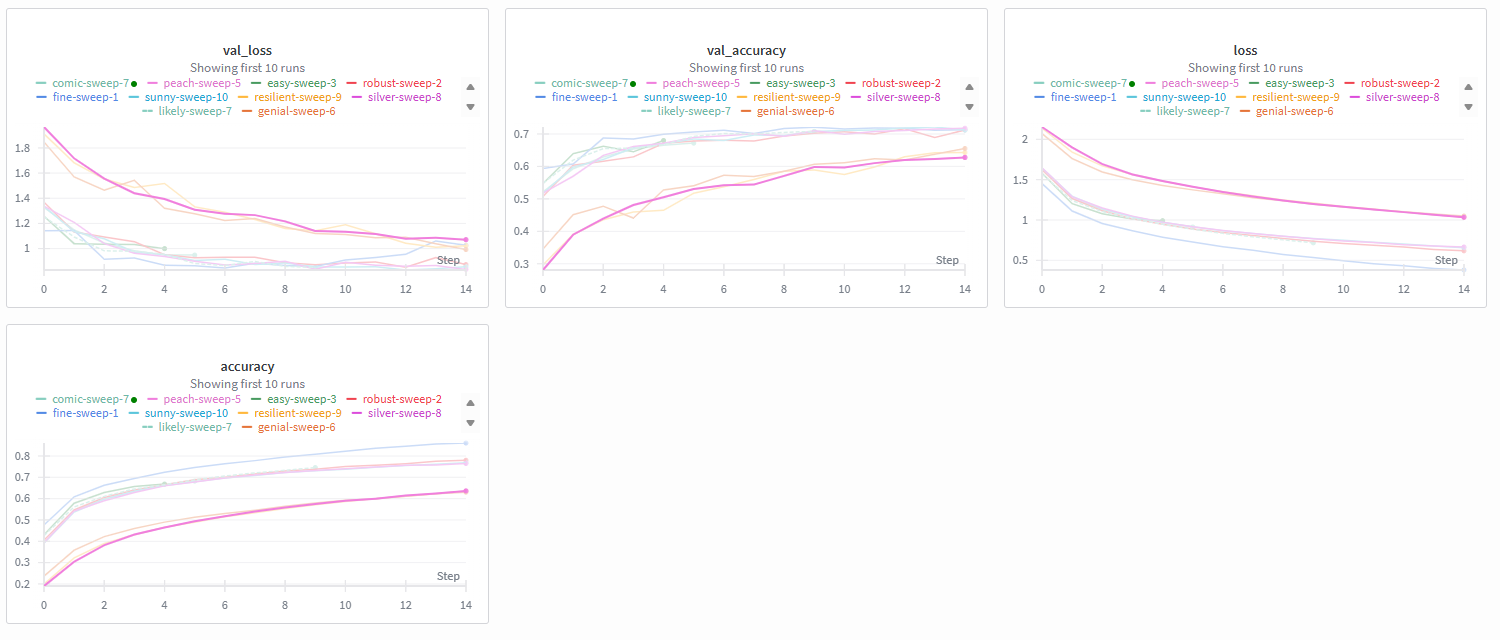

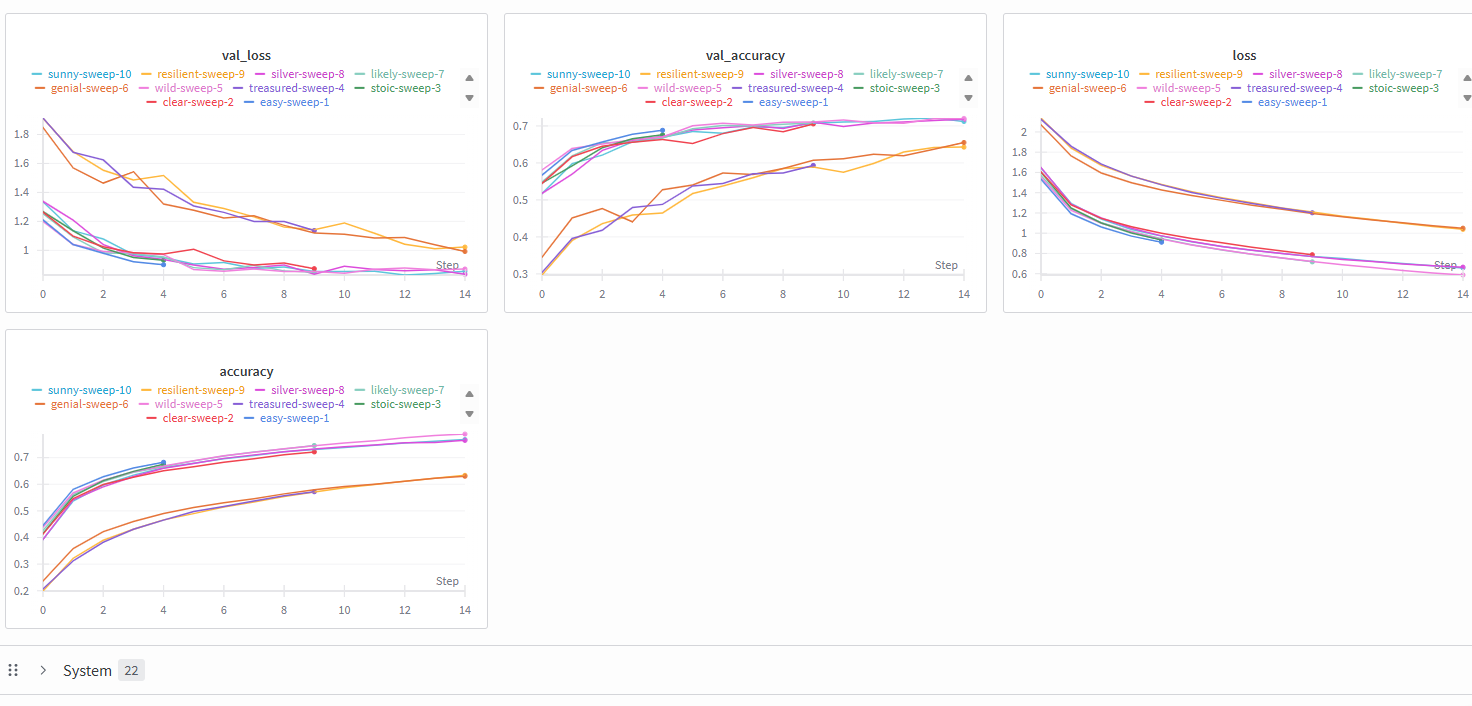

In [10]:
import numpy as np
from sklearn.metrics import classification_report

BEST_CONFIG = {
    'optimizer': 'adam',
    'epochs': 10,
    'num_conv_layers': 2,
    'dropout': 0.3
}

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

final_model = Sequential()
final_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
final_model.add(MaxPooling2D(pool_size=(2, 2)))
for _ in range(BEST_CONFIG['num_conv_layers']):
    final_model.add(Conv2D(64, (3, 3), activation='relu'))
    final_model.add(MaxPooling2D(pool_size=(2, 2)))
final_model.add(Flatten())
final_model.add(Dense(128, activation='relu'))
final_model.add(Dropout(BEST_CONFIG['dropout']))
final_model.add(Dense(10, activation='softmax'))

final_model.compile(optimizer=BEST_CONFIG['optimizer'],
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

final_model.fit(x_train, y_train_cat, epochs=BEST_CONFIG['epochs'], validation_data=(x_test, y_test_cat))

predictions = final_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("\nFinal Model Classification Report")
print(classification_report(y_test, predicted_classes, target_names=class_names))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.3163 - loss: 1.8243 - val_accuracy: 0.5336 - val_loss: 1.2921
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5457 - loss: 1.2767 - val_accuracy: 0.6238 - val_loss: 1.0742
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6118 - loss: 1.1059 - val_accuracy: 0.6362 - val_loss: 1.0220
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6456 - loss: 1.0034 - val_accuracy: 0.6202 - val_loss: 1.0910
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6696 - loss: 0.9291 - val_accuracy: 0.6752 - val_loss: 0.9224
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6941 - loss: 0.8688 - val_accuracy: 0.6928 - val_loss: 0.8800
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7165 - loss: 0.8184 - val_accuracy: 0.6945 - val_loss: 0.8687
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7276 - loss: 0.7731 -